# Metody esploracji danych - laboratorium 3 zadanie 1

Klasyfikacja na podstawie klasyfikatora bayesowskiego i najbliższego sąsiedztwa

In [1]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Załadowanie danych

In [2]:
data_dir = Path('data')
data_file = data_dir / 'med_lab_3_zad_2.csv'

In [5]:
df = pd.read_csv(data_file, sep=';', index_col=0)

In [6]:
df.head()

,pieniądz,darmowy,bogaty,nieprzyzwoicie,tajny,spam
nr,,,,,,
1,nie,nie,tak,nie,tak,tak
2,tak,tak,tak,nie,nie,tak
3,nie,nie,nie,nie,nie,nie
4,nie,tak,nie,nie,nie,tak
5,tak,nie,nie,nie,nie,nie


## Przygotowanie danych

In [7]:
df = df.replace({'tak': 1, 'nie': 0})

In [8]:
df.head()

,pieniądz,darmowy,bogaty,nieprzyzwoicie,tajny,spam
nr,,,,,,
1,0,0,1,0,1,1.0
2,1,1,1,0,0,1.0
3,0,0,0,0,0,0.0
4,0,1,0,0,0,1.0
5,1,0,0,0,0,0.0


In [9]:
train_df = df[df['spam'].notnull()]
test_df = df[df['spam'].isnull()]

In [10]:
X_train = train_df.drop('spam', axis=1)
y_train = train_df['spam']
X_test = test_df.drop('spam', axis=1)

### Macierz korelacji

<Axes: >

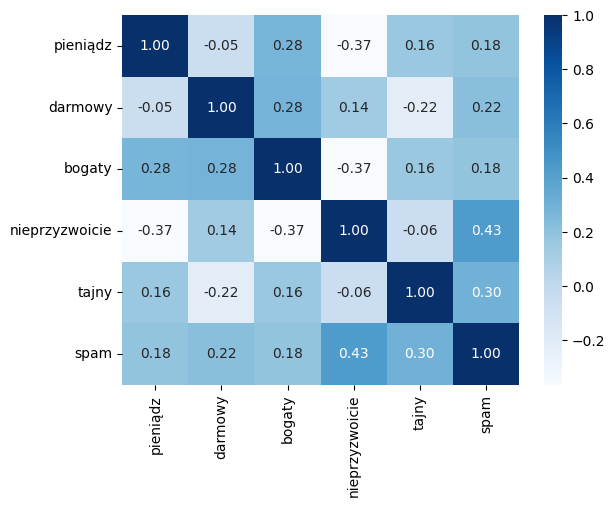

In [23]:
# Corleation matrix
corr = train_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')

## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = gnb.predict(X_test)
y_pred = y_pred.astype(bool)

In [21]:
print(test_df)
print(y_pred)

    pieniądz  darmowy  bogaty  nieprzyzwoicie  tajny  spam
nr                                                        
14         1        0       1               0      1   NaN
[False]
